In [3]:
# Kevin Fan
# Group: Amiya Li
# CMSC320 0201
# UID 118753201

In [4]:
# imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api
import statsmodels.graphics.boxplots
from sklearn.linear_model import LinearRegression

In [5]:
# getting the data

data = pd.read_csv("08_gap-every-five-years.tsv", sep='\t')


<Axes: xlabel='year', ylabel='lifeExp'>

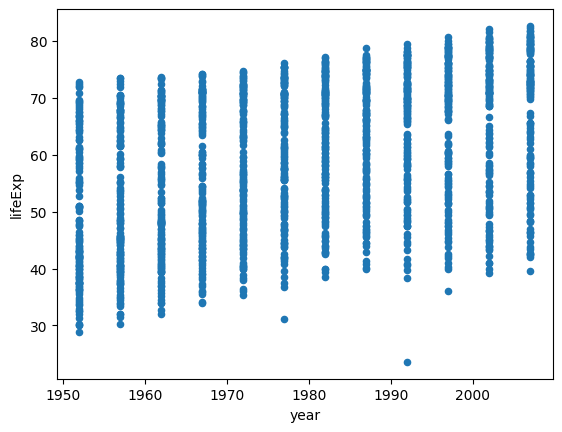

In [6]:
# exercise 1
# this code creates a scatterplot using the data from the tsv file of life expectancy vs year

data.plot.scatter(x="year", y="lifeExp")

In [7]:
# question 1
# life expectancy is increasing over time. it is somewhat linear, although difficult to conclude

<Axes: xlabel='year', ylabel='lifeExp'>

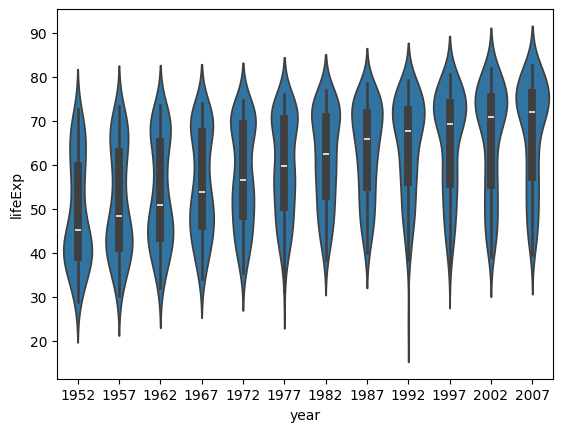

In [8]:
# making a violin plot of the data with seaborn to observe

sns.violinplot(data, x="year", y="lifeExp")

In [9]:
# question 2
# the distribution of life expectancy across countries for individual years is generally skewed either to the lower or higher end
# with less points in between
# from 1952-1962,points cluster to around lower life expectancies, increasing with time,
# most of the years are unimodal in either the lower or higher end, but around 1962 and 1967 there is roughly two modes in each, at both the
# lower and higher ends - these are also the years closest to symmetric around the center for life expectancy, while other years
# have data focused on exclusively either the lower or higher end

In [10]:
# question 3
# the null hypothesis should be rejected - visually it seems likely that life expectancy increases with year, and
# this is intuitive; while it's possible the relationship might not be linear, it's a plausible
# assumption that it is

In [11]:
# question 4
# sincethe null hypothesis was rejected, it might be a linear plot of
# residuals around the x-axis if the data has a linear relationship

In [12]:
# question 5
# if the data fits a linear model, the plot should group around the x axis with no residual

In [13]:
# exercise 2
# this code uses scikit-learn to fit a linear regression function to life expectancy vs year

reg = LinearRegression().fit(data["year"].to_frame(), data["lifeExp"].to_frame())


In [14]:
# question 6

# printing the slope  for the linear regression model of life expectancy vs year
print(reg.coef_)

# on average, life expectancy increases each year by roughly 0.326 years

[[0.32590383]]


In [15]:
# question 7

# uses statsmodels to frind regression model p val
model = statsmodels.formula.api.ols(formula="lifeExp ~ year", data=data).fit()
model.pvalues

#the p value is low enough to state that the chance there is a relationship between the values is statistically significant

Intercept    2.897807e-67
year         7.546795e-80
dtype: float64

<Axes: xlabel='year', ylabel='residual'>

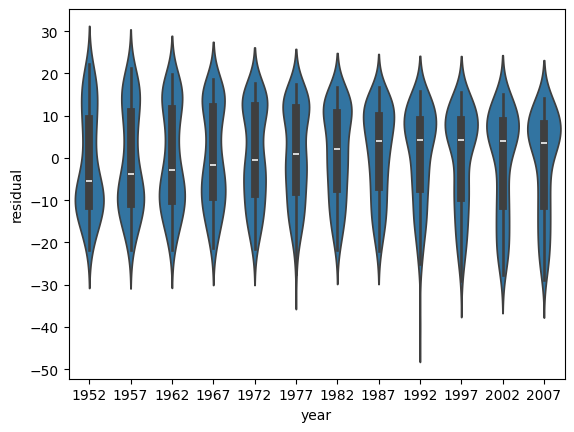

In [16]:
# exercise 3
# this code uses seaborn to make a violin plot of the residuals vs year,
# residuals being the difference between the actual life expectancies per year and the
# predicted value
prediction = reg.predict(data["year"].to_frame())
data["residual"] = data["lifeExp"].to_frame() - prediction
sns.violinplot(data, x="year", y="residual")

In [17]:
# question 8
# the data is close to the x axis, albeit still similar to the original plot
# this is intuitive given that data clusters move from low to high as time goes on

<Axes: xlabel='continent', ylabel='residual'>

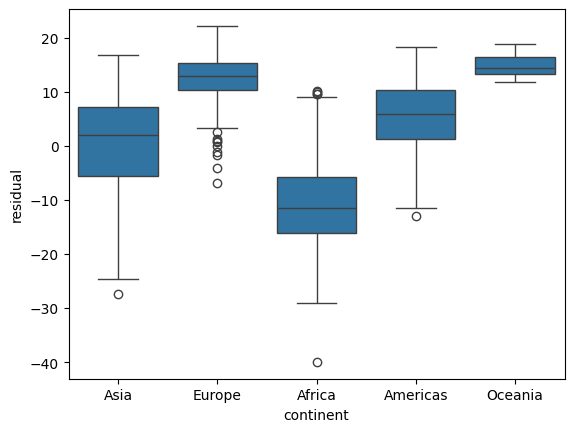

In [18]:
# exercise 4
# this code uses seaborn to make a box plot of residuals vs continent

sns.boxplot(data, x="continent", y="residual")

In [19]:
# question 9

# americas and asia are close to no residuals, whereas the other continents have greater residuals. 
# Perhaps regression analysis should be done for each continent individually

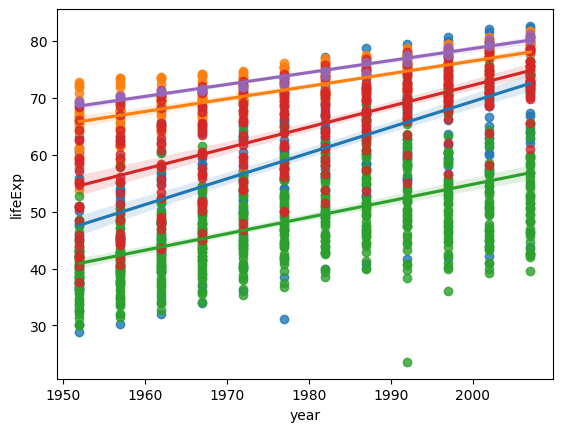

In [20]:
# exercise 5
# this code uses seaborn to create a scatter plot with a regression line for each continent

for cont in data["continent"].unique():
    sns.regplot(x=data.loc[data["continent"] == cont, "year"], y=data.loc[data["continent"] == cont, "lifeExp"])


In [21]:
# question 10

# the regression slopes do differ, making continent at least a correlating factor in life expectancy.

In [22]:
# exercise 6
# this code uses statsmodels to fit a regression model of life expenctancy vs an interaction between
# year and continent
model_i = statsmodels.formula.api.ols(formula="lifeExp ~ continent * year", data=data).fit()

In [23]:
# question 11

# check for significance by evaluating p-values of interactions
model_i.pvalues

# p values do not differ much from 0 besides from oceania 


Intercept                     3.436134e-53
continent[T.Americas]         1.649695e-02
continent[T.Asia]             4.139916e-09
continent[T.Europe]           4.051687e-03
continent[T.Oceania]          2.872034e-01
year                          1.953998e-62
continent[T.Americas]:year    7.584665e-03
continent[T.Asia]:year        1.149941e-09
continent[T.Europe]:year      1.417280e-02
continent[T.Oceania]:year     3.597980e-01
dtype: float64

In [24]:
# question 12
# answers in code below

#obtaining slope params
print("Americas: lifeExp increases " + str(model_i.params.iloc[5] + model_i.params.iloc[6]) + " years per year, on average")
print("Asia: lifeExp increases " + str(model_i.params.iloc[5] + model_i.params.iloc[7]) + " years per year, on average")
print("Europe: lifeExp increases " + str(model_i.params.iloc[5] + model_i.params.iloc[8]) + " years per year, on average")
print("Oceania: lifeExp increases " + str(model_i.params.iloc[5] + model_i.params.iloc[9]) + " years per year, on average")

Americas: lifeExp increases 0.3676509370642922 years per year, on average
Asia: lifeExp increases 0.45312240390023006 years per year, on average
Europe: lifeExp increases 0.22193214452329646 years per year, on average
Oceania: lifeExp increases 0.2102723776234871 years per year, on average


In [25]:
# exercise 7
# this code uses fvalue to perform an f-test on the first model that compares year to life expectancy,
# and the second model that includes a continent-year interaction compared to life expectancy

print("year only model fvalue: " + str(model.fvalue))
print("year-continent interaction model fvalue: " + str(model_i.fvalue))

year only model fvalue: 398.6047457117635
year-continent interaction model fvalue: 424.27290234006927


In [26]:
# question 13
# the interaction model is significantly better than the year only model due to a larger f value


<Axes: xlabel='year', ylabel='None'>

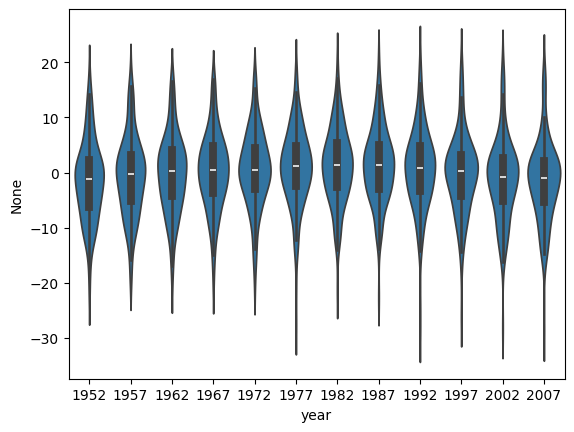

In [32]:
# exercise 8
# Make a residuals vs. year violin plot for the interaction model. 
sns.violinplot(x=data["year"], y=model_i.resid)
# Matches the assumptions of the linear regression model due to the mean and clusters all staying relatively 
# close to the x axis


<Axes: xlabel='year', ylabel='None'>

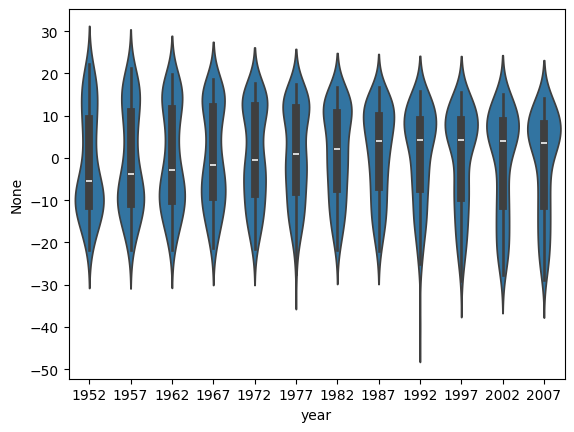

In [30]:
# Do the same for a residuals vs. fitted values model.
sns.violinplot(x=data["year"], y=model.resid)
# This fits the linear regression model less strongly, as clusters and means vary above the x xis